## Class 3: Fitting models to data

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. $\underline{{\rm Choosing\ a\ model\ for\ your\ data}}$

Fitting models to data typically involves either fitting a line or a curve to a scatter plot. Our decisions about which type of model we want to fit to our data depends on:
* the shape of our data
* our understanding of the physical processes involved in creating/obtaining the data

## 1.1 Standard linear model
Let's make some toy data with scatter that we will use to fit a line. (Yes, we will already know the solution to this data but just for the sake of learning how to fit a line, let's pretend.)

In [2]:
#let's make an array of x-values from 0-10 and y-values with some scatter

#let's make a random seed so we get the same scatter every time
np.random.seed(0)

x      = np.arange(10)
y_true = 2+x*3 + np.random.randn(10)

Text(0, 0.5, 'hypothetical measurement')

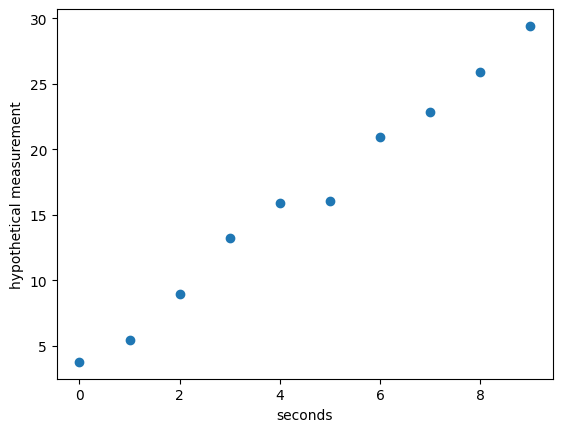

In [3]:
#let's make a scatter plot
#lgive our x-axis units of time in seconds
#our y-axis can be "hypothetical measurement"
plt.scatter(x, y_true)
plt.xlabel('seconds')
plt.ylabel('hypothetical measurement')

#### PRETEND WE DIDN'T CREATE THIS TOY DATA OURSELVES
Ok, so let's say we are making some observations, we plot our measurements and the above is what we get. So we can say that our data appears to have a linear trend. As time increases, the value of our hypothetical observable also increases.

We can therefore attempt to fit the data with a linear function.

First write a function for a line:

In [4]:
def line(b,m,x):
    '''this function returns y-values for a line.
    parameters:
    -----------
    b: (int or float, y-intercept)
    m: (int or float, slope)
    x: (int, float or array, the independent variable )
    returns:
    --------
    y-values for a line: (int, float, or array)
    '''
    y = b + m*x
    return y

We are going to essentially make lots of guesses for the parameters.
We will be fitting a line, so we want to create several models (lines) using different values for the parameters and plot the lines over your scatter plot and see which one fits best.

We will want to visually inspect our plot to determine some initial guesses for the parameters.

The data seems to have a y-intercept near 0, so let's try b=0 first. The slope appears something like "up 5 and over 2" so let's try a few values for "m" (2, 3, 4).

In [5]:
# let's make the three models using b=0 and m=2,3and4
line_a = line(0,2, x)
line_b = line(0,3, x)
line_c = line(0,4, x)

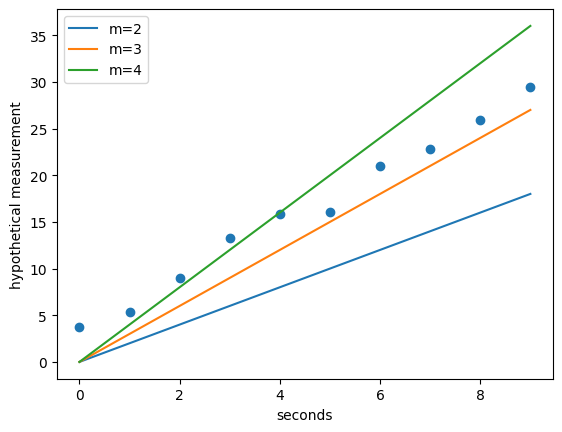

In [6]:
# and now let's plot and visually inspect

### LET'S DESCRIBE THE SYNTAX AND OUTPUT TOGETHER
plt.scatter(x, y_true)
plt.plot(x, line_a, label = 'm=2')
plt.plot(x, line_b, label = 'm=3')
plt.plot(x, line_c, label = 'm=4')
plt.xlabel('seconds')
plt.ylabel('hypothetical measurement')
plt.legend()

Ok, our y-intercept was way off, let's try b=2

In [7]:
line_a = line(2,2,x)
line_b = line(2,3, x)
line_c = line(2,4, x)

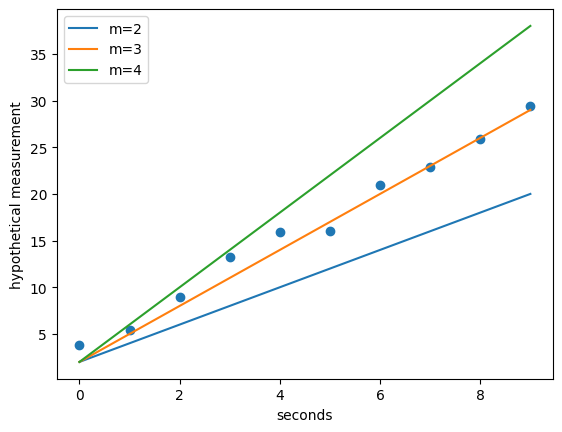

In [8]:
plt.scatter(x, y_true)
plt.plot(x, line_a, label = 'm=2')
plt.plot(x, line_b, label = 'm=3')
plt.plot(x, line_c, label = 'm=4')
plt.xlabel('seconds')
plt.ylabel('hypothetical measurement')
plt.legend()

Ok, what can we conclude????

# $\underline{{\rm Exercise\ A.}}$
Let's say we want to try more options for possible values of the m parameter. Fitting by hand the way we did is not the most efficient. We can utilize the power of loops to iterate through the values for us!

1. Create an array or list that holds the following values for the m parameter: 2.8, 2.9, 3.0, 3.1, 3.2

2. Create a two-dimensional zero array that you will call "y_new", using the np.zeros() function, with dimensions pxq, that will hold the predictions of all your models. If we are going to try models with b = 2 and m = (2.8, 2.9, 3.0, 3.1, 3.2), we will have 5 total models. You will need "y_new" to have dimension p = the number of models, and q = the number of x values.
https://numpy.org/doc/stable/reference/generated/numpy.zeros.html

3. Write a short script that loops through all the m-values, passes them to your line function, and assigns the predictions to the appropriate indeces of "y_new".


4. After you're done check the following:\
y_new[0].max() -> 27.2\
y_new[2].max() -> 29.0\
y_new[4].max() -> 30.8

In [9]:
#let's create a list or array to hold my m values
m_list = [2.8, 2.9, 3.0, 3.1, 3.2]
# create an array to store the values, 5 models with 10 values each, this is a 5x10 array
y_new = np.zeros((5,10), dtype = float)

for i, el in enumerate(m_list):
    y_new[i] = line(2,el,x)

In [10]:
print(y_new[0].max())
print(y_new[2].max())
print(y_new[4].max())

27.2
29.0
30.8


# 2. $\underline{{\rm Evaluating\ your\ models}}$

Inspecting our model fit by eye is important, but in order to have quantative evidence of best fit, we need to use a statistical evaluation method.

## 2.1 Mean Square Error (MSE)
The mean square error is only one of many estimators used to determine how well a model caprures data. It measures the average of the squared difference between the model predicted values and the true values.
https://en.wikipedia.org/wiki/Mean_squared_error

The formula is:

$$ {\rm MSE} = \frac{1}{n}\sum_i^n (y_i-\hat{y}_i)^2$$
where $n$ is the total number of the data sample, $\sum_i^n$ means "sum" (to add up), $y$ are the model predicted values and $\hat{y}$ are the true values.

In [11]:
# Let's write a function the measures the MSE

def mse(pred, true):
    diff_squ = (pred-true)**2
    return np.mean(diff_squ)

And now let's evaluate our 5 models from y_new

In [12]:
# I will do this in a loop

for i in range(5):
    print(i, mse(y_new[i], y_true))

0 3.3869132444556294
1 2.1484168227442773
2 1.4799204010329265
3 1.3814239793215772
4 1.8529275576102289


What can we conclude from the above scores???

In [13]:
### LET'S PLOT THE BEST MODEL!

## 2.2 Residual plots
A residual plot shows the difference between your model predicted values and your true values. It allows us to see if there are any trends that our model didn't capture. In a perfect model, all residuals would = 0. Generally we want to see residuals that are uniformly spread and as close to 0 as possible.

Let's make a scatter plot of residuals from our best model

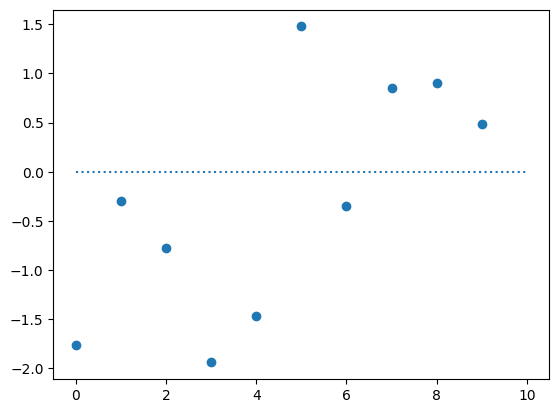

In [14]:
# define variable to hold residuals
### LET"S DESCROBE THE SYNTAX AND OUTPUT TOGETHER!

resids = y_new[3] - y_true

#plot the residuals
plt.scatter(x, resids)
plt.hlines(y=0, xmin=0, xmax=10, linestyle=':')

What can we conclude from our residual plot?

### There are many more estimators for evaluating models. Our toy data is not a statistical sample because it has very few data points. Furthermore we don't have any information on the errors of our "observations". With a statistical sample size (of ~1000+) that contain error data, we can use more robust estimators such as the '$\chi^2$' ("chi-square"), which you will use in your HW tonight!

Note: numpy has the mse estimator as a built-in function. But it was a good exercise for us to write our own in order for us to understand what it does.

# $\underline{{\rm Exercise B.}}$
Find the line of best fit for the Hubble 1929 data.
1. Make a scatter plot of the Hubble data with distance on the x-axis and radial velocity on the y-axis. Don't forget to label your axes!

2. Choose a y-intercept (b) and three guesses for slope (m) and plot those three models over your scatter plot in order to visually inspect your initial guesses.

3. Adjust your guess for the y-intercept if needed, and create:\
i. an array to hold 10 possible values for the slope, and\
ii. an array to hold the predictions for the 10 models

4. compute the mse scores for the 10 models

5. plot your best model over your scatter plot. What do you think?

In [15]:
hub = np.loadtxt('hubble1929.csv', skiprows=1, usecols=[1,2], delimiter=',')
dist = hub[:,0]
vel = hub[:,1]

Text(0, 0.5, 'Radial velocity [km/s]')

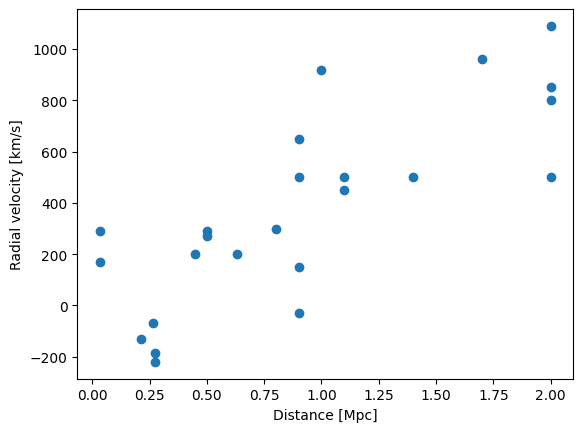

In [16]:
plt.scatter(dist, vel)
plt.xlabel('Distance [Mpc]')
plt.ylabel('Radial velocity [km/s]')

In [17]:
hub_x = np.linspace(0,2.25, num=10)
hub_m1 = line(-200, 200/0.25, hub_x)
hub_m2 = line(-200, 200/0.35, hub_x)
hub_m3 = line(-200, 200/0.5, hub_x)

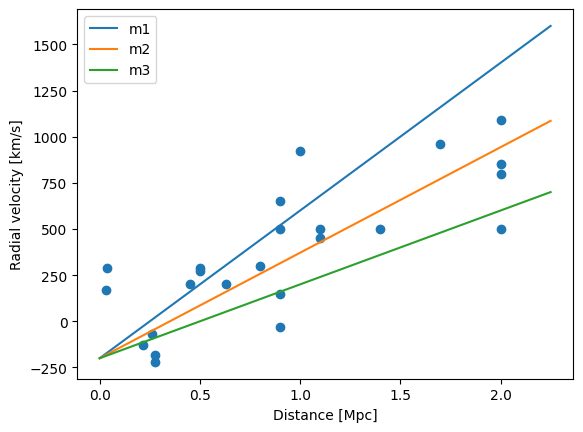

In [18]:
plt.scatter(dist, vel)
plt.plot(hub_x, hub_m1, label ='m1')
plt.plot(hub_x, hub_m2, label ='m2')
plt.plot(hub_x, hub_m3, label ='m3')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Radial velocity [km/s]')
plt.legend()

In [19]:
hub_slopes = np.linspace(200/0.6, 200/0.4, num=10)

In [20]:
hub_vel_new = np.zeros((10, dist.shape[0]), dtype = float)

for i, el in enumerate(hub_slopes):
    hub_vel_new[i] = line(-200,el,dist)

In [21]:
for i in range(10):
    print(i, mse(hub_vel_new[i], vel))

0 128096.52777777775
1 117640.1742541152
2 108027.37911522633
3 99258.14236111108
4 91332.46399176953
5 84250.34400720162
6 78011.7824074074
7 72616.77919238682
8 68065.33436213991
9 64357.447916666664


In [22]:
# I want to save my mse scores to an array

scores = np.zeros(10, dtype=float)

for i in range(10):
    scores[i]= mse(hub_vel_new[i], vel)

In [23]:
scores

array([128096.52777778, 117640.17425412, 108027.37911523,  99258.14236111,
        91332.46399177,  84250.3440072 ,  78011.78240741,  72616.77919239,
        68065.33436214,  64357.44791667])

In [24]:
#np.argmin will return the index ofthe lowest value in our scores array
np.argmin(scores)

np.int64(9)

In [25]:
hub_slopes[9]

np.float64(500.0)

In [26]:
hub_best = line(-200, hub_slopes[9], hub_x)

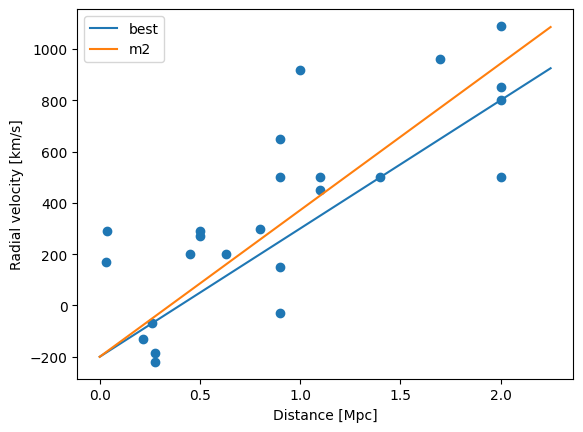

In [27]:
plt.scatter(dist, vel)
plt.plot(hub_x, hub_best, label ='best')
plt.plot(hub_x, hub_m2, label ='m2')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Radial velocity [km/s]')
plt.legend()

# 3. $\underline{\rm{Integral\ functions}}$

It is completely fine that you have not yet taken integral calculus! After our brief overview about what integrals are, you are ready to try out a numerical interal function from scipy, in the form scipy.integrate.quad()
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

quad takes these arguments:\
func, a, b, args=()
- func: the function to integrate
- a: the lower limit of the integral
- b: the upper limit of the integral
- args=(): the other arguments that must be passed to the function you are integrating, *except* for the variable of integration itself.

Let's try out a few.

In [28]:
#import quad
from scipy.integrate import quad

## 3a. Simple integral

Our integral is:

$$ f(x) = 5\int_{x_i}^{x_f}x^3 dx$$

We see that the only variable this integral depends on is $x$. There is a constant outside the integral, 5, which can simply be multiplied to the integrand.

In [29]:
#start by writing the integrand function
def f_integrand(x):
    f = 5*x**3
    return f

Now let's integrate from 0 to 10 using quad()

In [30]:
# LET'S DISCUSS THE SYNTAX AND OUTPUT TOGETHER
quad(f_integrand,0,10)

(12500.0, 1.3877787807814457e-10)

In [31]:
quad(f_integrand,0,10)[0]

12500.0

we see that quad returns a tuple with (the final numerical value, the error), so we only want to pay attention to index 0 of the output

In [32]:
# LET'S DISCUSS THE SYNTAX AND OUTPUT TOGETHER
quad(f_integrand,0,10)[0]

12500.0

## 3b. more complicated integral

Our integral is:

$$ g(x,k) = 5\int_{x_i}^{x_f}x^2 + cos(x) + k\ dx$$

We see that this integral depends on $x$ and a constant $k$, although $x$ is the only variable of integration. There is also a constant, 5, outside the integral which we know how to handle now.

But what do we do about $k$? Well, since $k$ is not the variable of integration, we have to give it a value in the args=() argument of quad().

In [33]:
#start by writing the integrand function
def g_integrand(x, k):
    f = 5*(x**2 + np.cos(x) + k)
    return f

Now let's integrate from 0 to 10 and pass k=10 using quad()

In [34]:
# LET'S DISCUSS THE SYNTAX AND OUTPUT TOGETHER
quad(g_integrand,0,10, args=(10))[0]

2163.94656111222

## 3c. Vectorizing your integral functions

As we know, we can typically pass arrays to functions. However when we are integrating, we are unable to pass arrays in quad() unless we vectorize our function of integration first. We can use np.vectorize() for this.

For what kind of scenario will we need to vectorize?

Let's say we want the numerical solutions to f(x) for many values of x on the way to the final x. While we can pass an array of x values directly to f_integrand(), we can't pass this array directly to the integral quad(f_integrand).

Here we will need to create an object that vactorizes our integral. Then we can pass the array of x values.

Let's do it.

In [35]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
# First we create a function that does the integral directly
def f_integral(x):
    return quad(f_integrand,0, x)[0]

In [37]:
#now we create an object that stores the vectorized integral
f_vectorized = np.vectorize(f_integral)

#now we pass an array to that vectorized integral.
#Let's just pass the x values we made in section 2 of this notebook.
f_vectorized(x)

array([0.00000e+00, 1.25000e+00, 2.00000e+01, 1.01250e+02, 3.20000e+02,
       7.81250e+02, 1.62000e+03, 3.00125e+03, 5.12000e+03, 8.20125e+03])

# $\underline{{\rm Exercise\ C.}}$

Vectorize g(x,k) and pass the same x-array to the vectorized integral for k=25.

check: the last element in the output array should be ~ 2342

In [38]:
def g_integral(x,k):
    return quad(g_integrand,0, x, args=(k))[0]

In [39]:
g_vectorized = np.vectorize(g_integral)
g_vectorized(x,25)

array([   0.        ,  130.87402159,  267.87982047,  420.70560004,
        602.88265419,  828.53871196, 1108.60292251, 1449.95159966,
       1858.28012457, 2342.06059243])